# <font color=blue>Assignments for "Visualization with Seaborn"</font>

In this assignment you will continue to make some plots on the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). For plotting you will use Seaborn library. 

1. Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [9]:
df_4 = df[df.location.isin(['Spain', 'France', 'Germany', 'Italy']) & (df.date >= '2020-04-01')]
df_4.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
10846,FRA,Europe,France,2020-04-01,52128.0,7578.0,3523.0,499.0,798.609,116.096,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
10847,FRA,Europe,France,2020-04-02,56989.0,4861.0,4032.0,509.0,873.080,74.471,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
10848,FRA,Europe,France,2020-04-03,59105.0,2116.0,4503.0,471.0,905.497,32.417,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
10849,FRA,Europe,France,2020-04-04,64338.0,5233.0,6507.0,2004.0,985.668,80.170,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
10850,FRA,Europe,France,2020-04-05,68605.0,4267.0,7560.0,1053.0,1051.039,65.371,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66


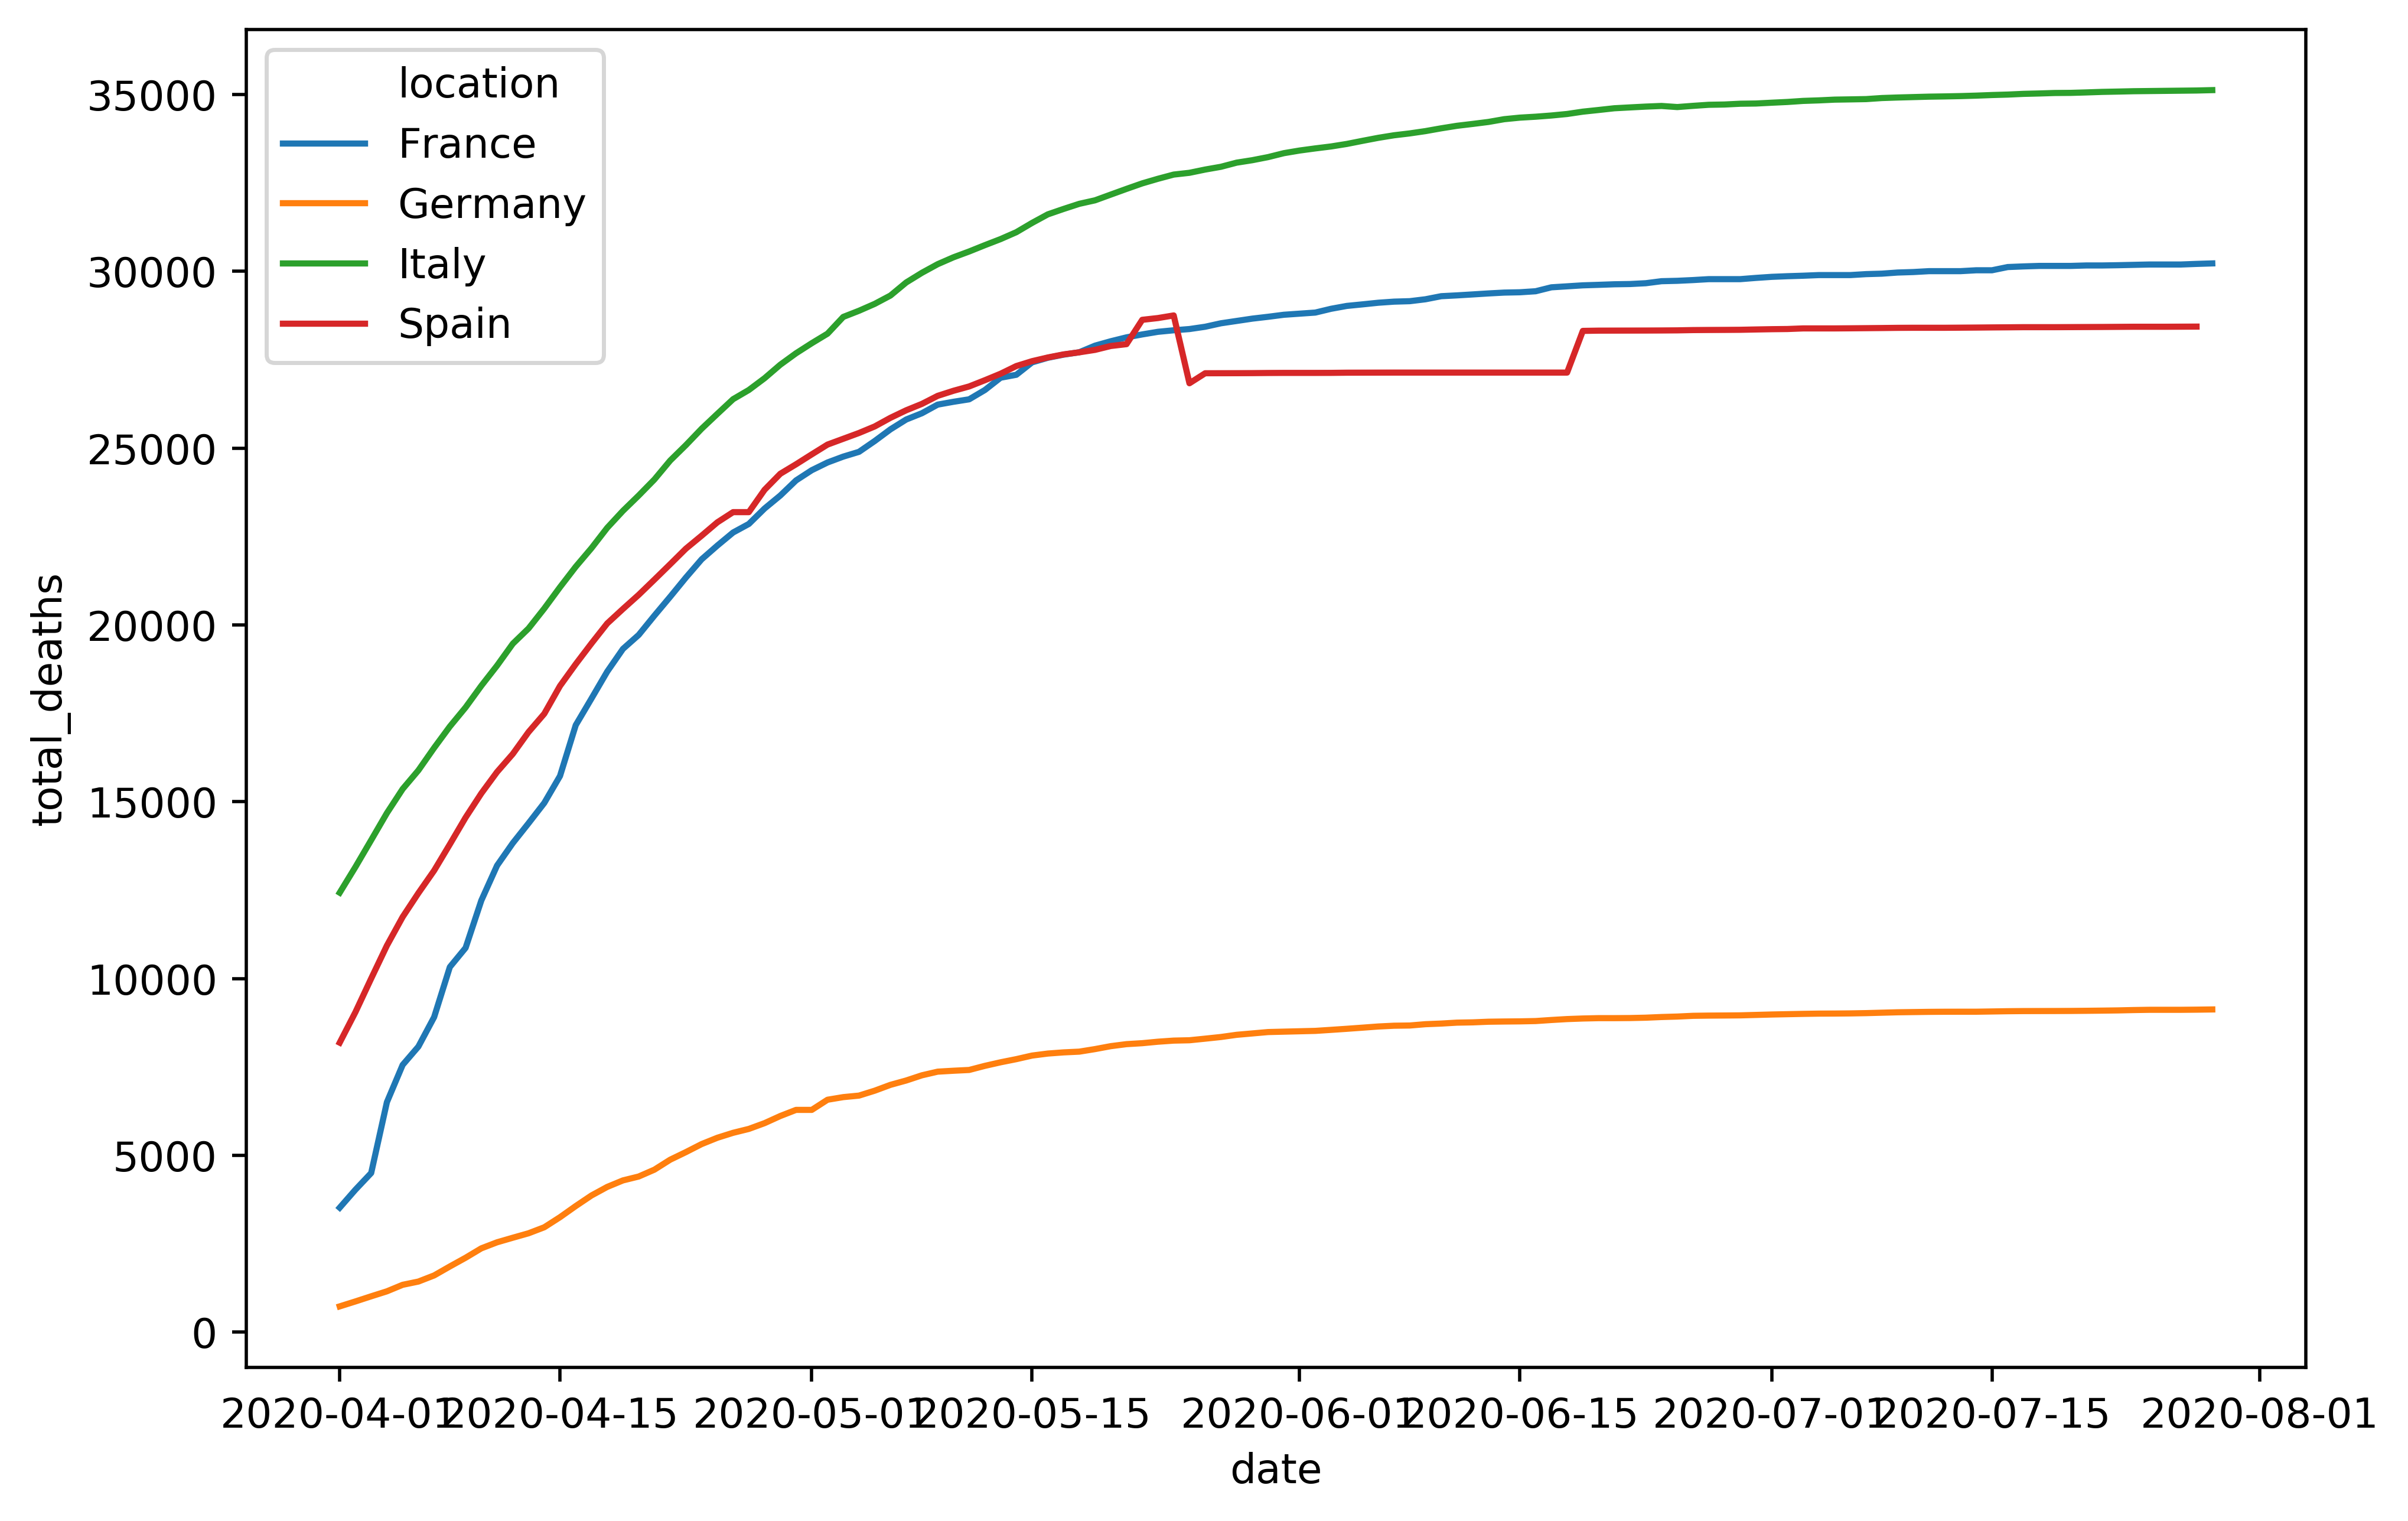

In [11]:
plt.figure(figsize=(9, 6), dpi = 500)
sns.lineplot(x = 'date', y= 'total_deaths', hue= 'location', data = df_4)
plt.show()


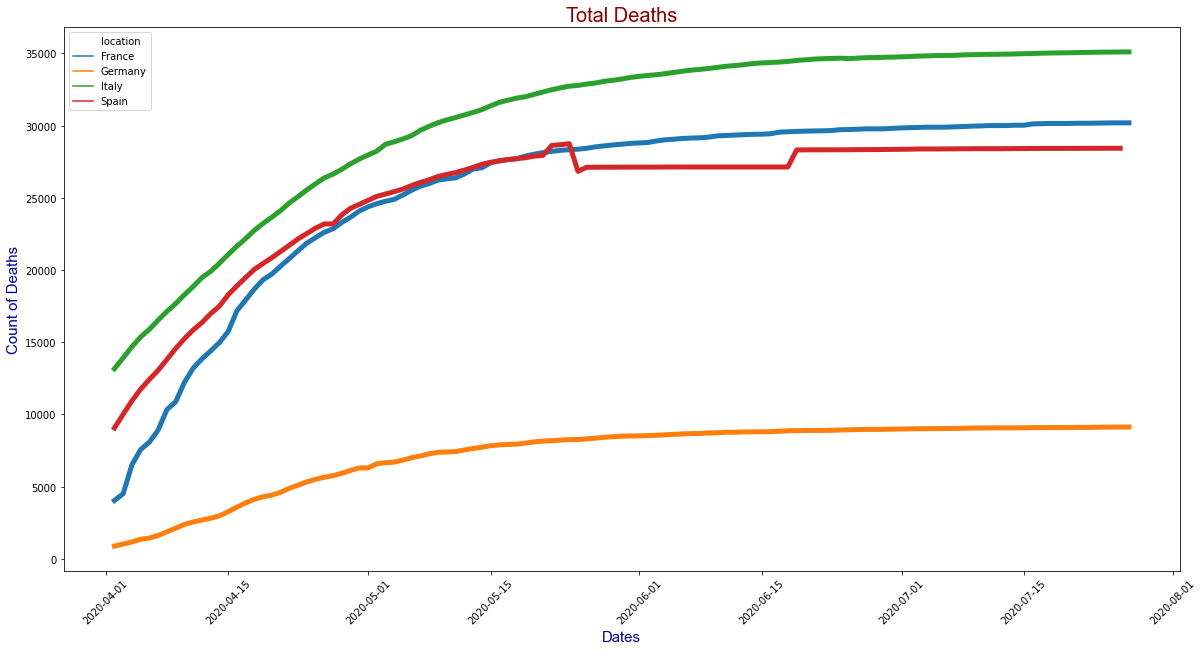

2. Plot a bar plot with seaborn for average death number that compares continents.

In [24]:
df.groupby('continent').total_deaths.mean()

continent
Africa             97.469896
Asia              574.324268
Europe           2088.278609
North America    2732.547241
Oceania            12.182274
South America    3008.232161
Name: total_deaths, dtype: float64

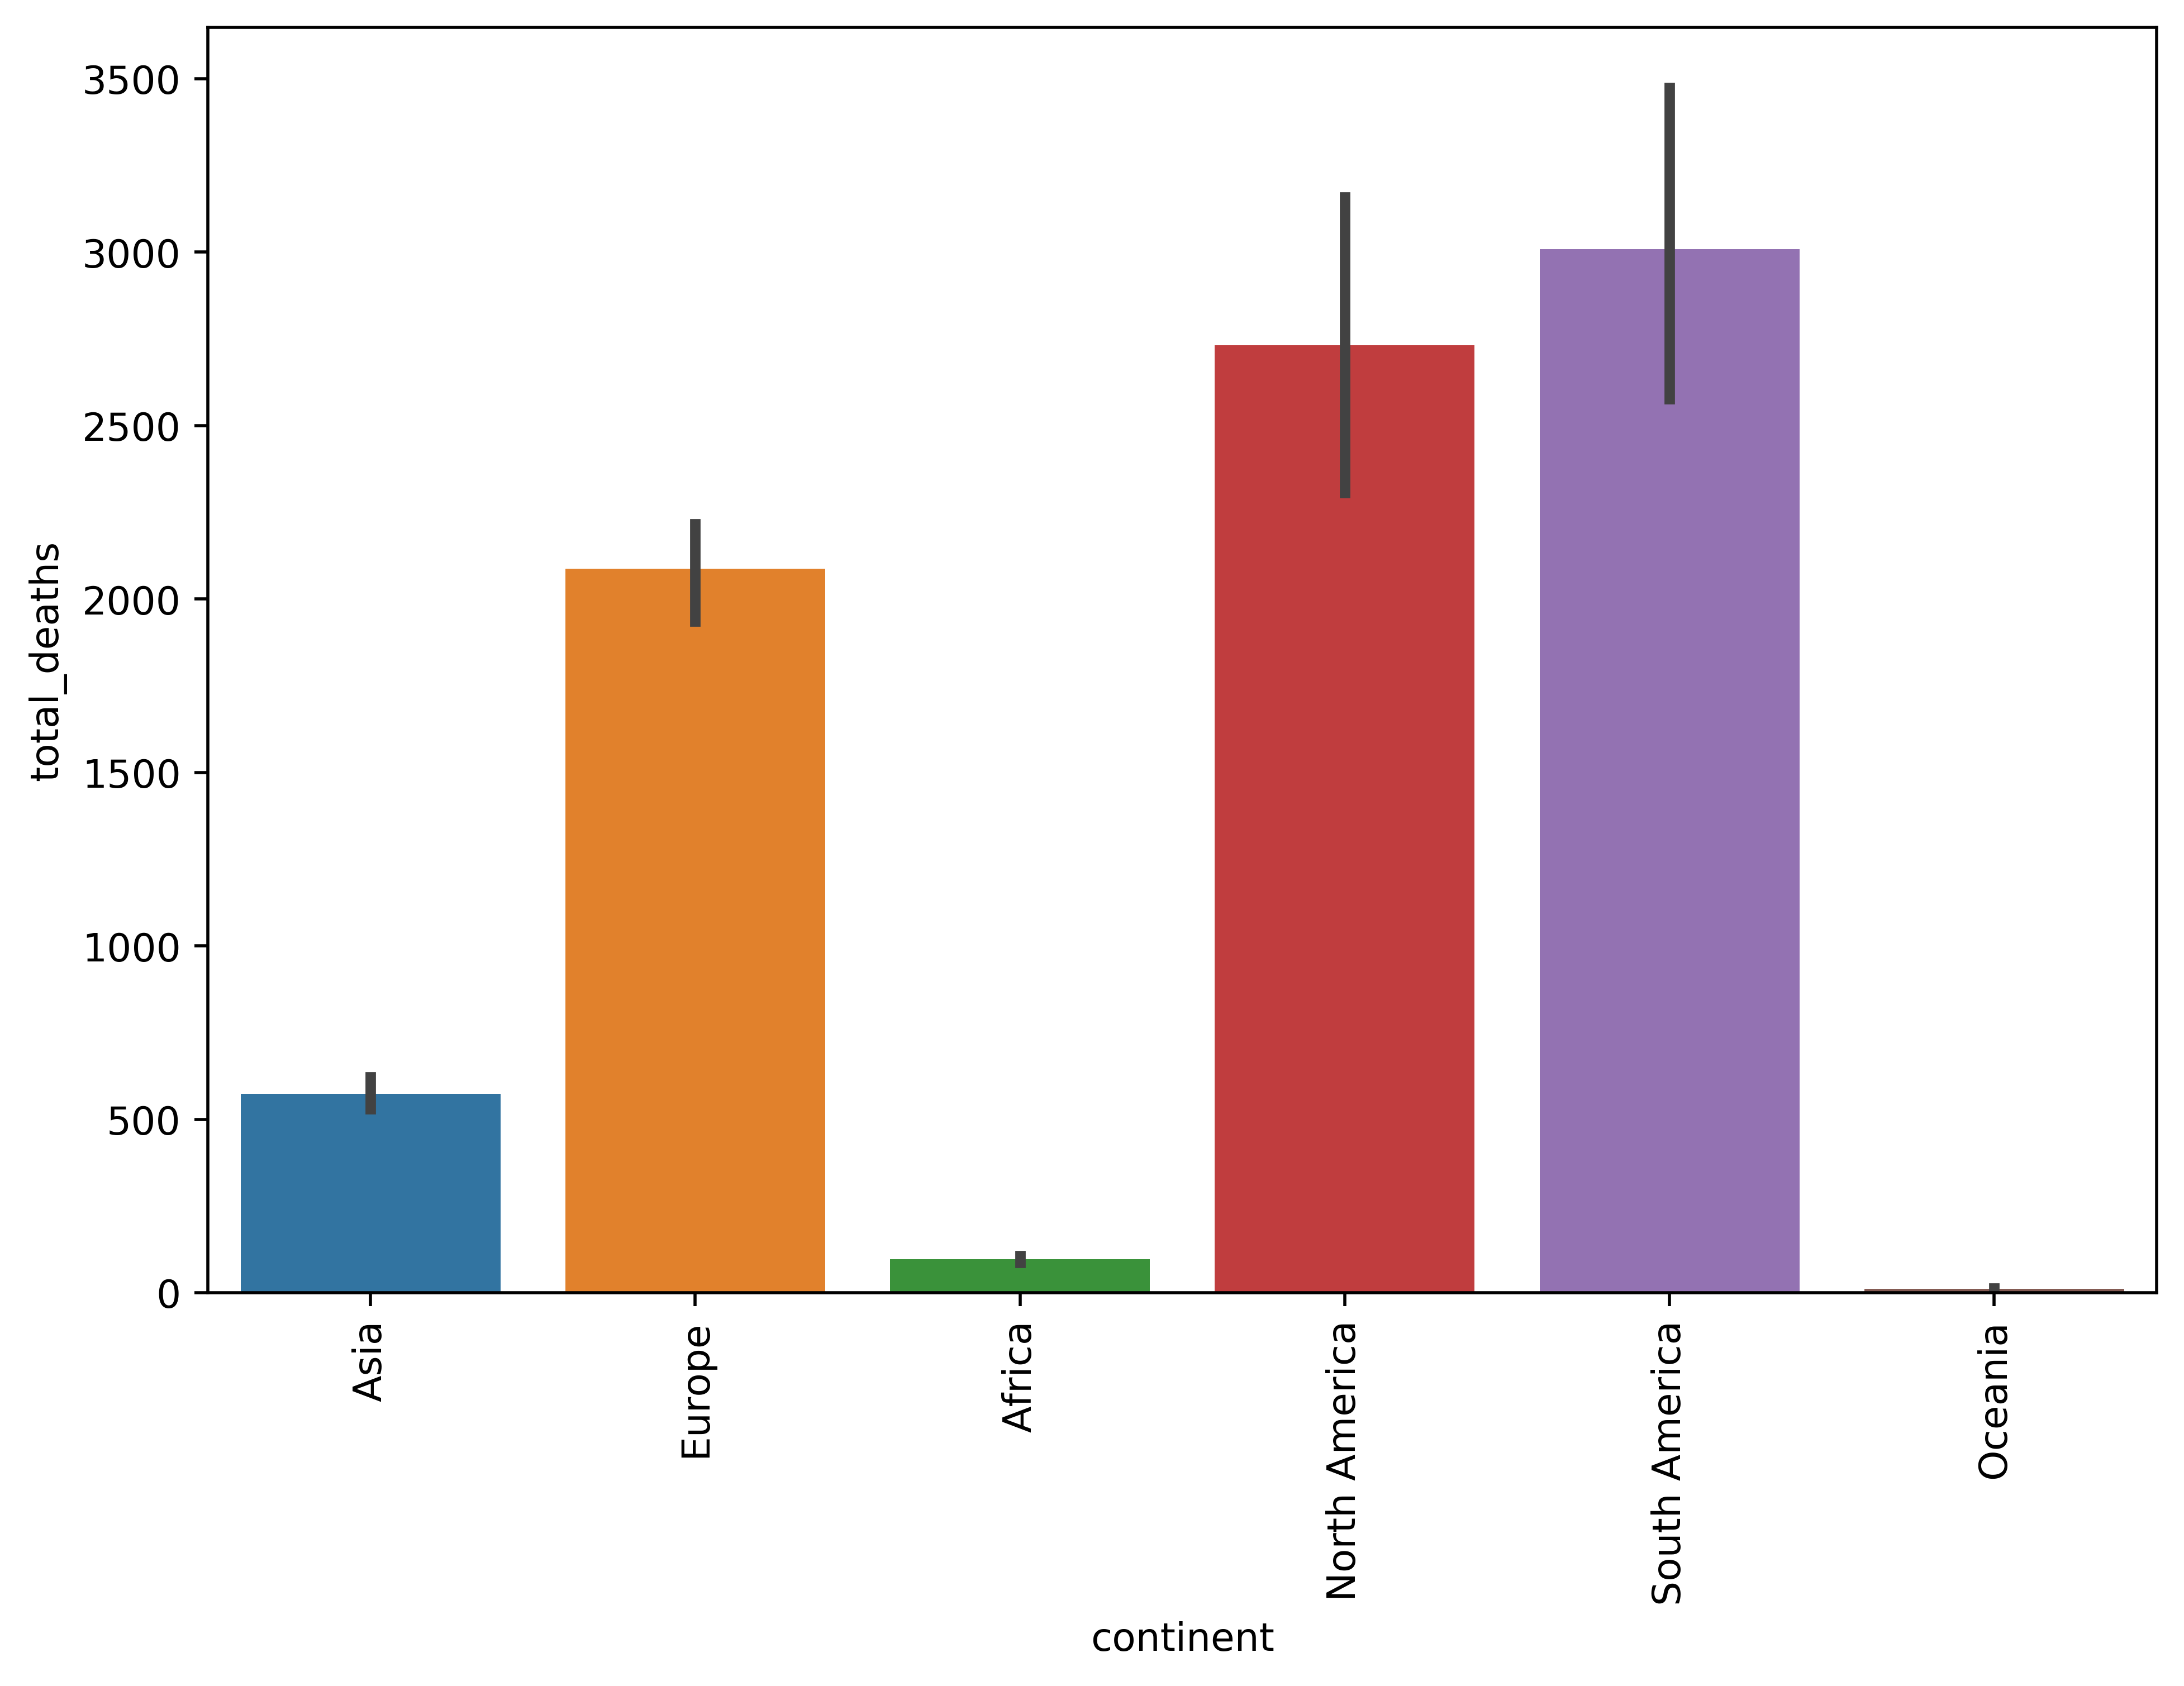

In [21]:
plt.figure(figsize=(9, 6), dpi = 500)
sns.barplot(x = 'continent', y = 'total_deaths', data = df)
plt.xticks(rotation = 90)
plt.show()

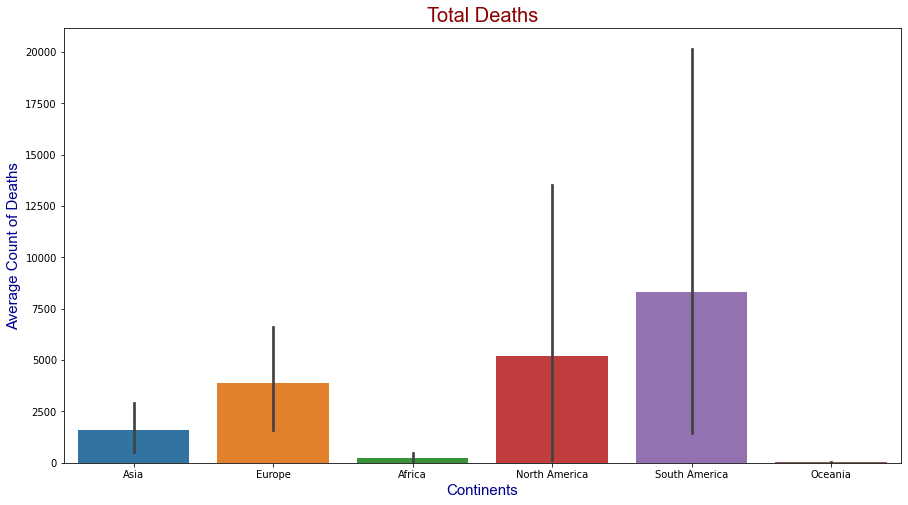

3. Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and `kde` arguments.

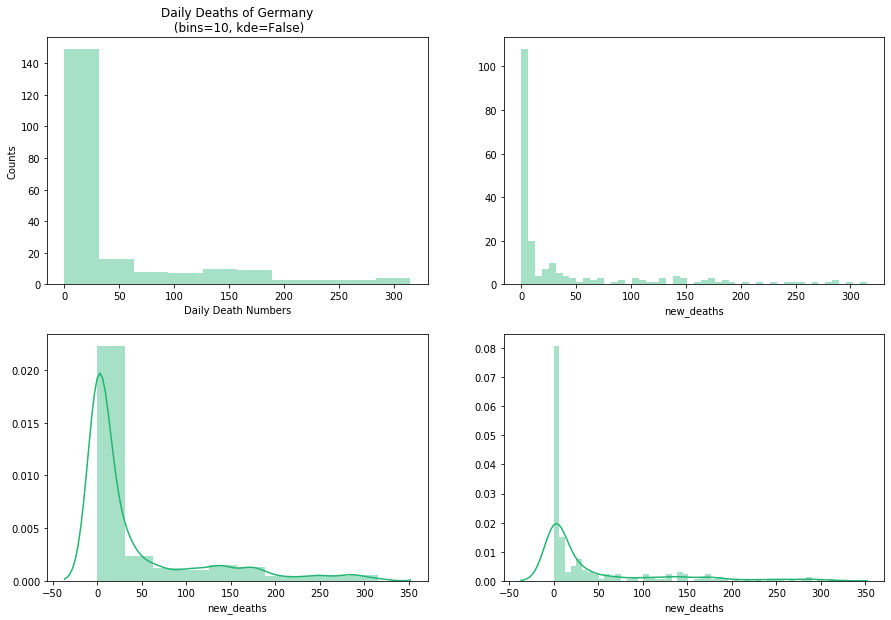

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.distplot(df[df.location=='Germany'].new_deaths.dropna(), color = '#22B573', bins =10, kde =False)
plt.title('Daily Deaths of Germany\n (bins=10, kde=False)')
plt.xlabel('Daily Death Numbers')
plt.ylabel('Counts')

plt.subplot(2,2,2)
sns.distplot(df[df.location=='Germany'].new_deaths.dropna(), color = '#22B573', bins =50, kde =False)

plt.subplot(2,2,3)
sns.distplot(df[df.location=='Germany'].new_deaths.dropna(), color = '#22B573', bins =10)

plt.subplot(2,2,4)
sns.distplot(df[df.location=='Germany'].new_deaths.dropna(), color = '#22B573', bins =50)

plt.show()



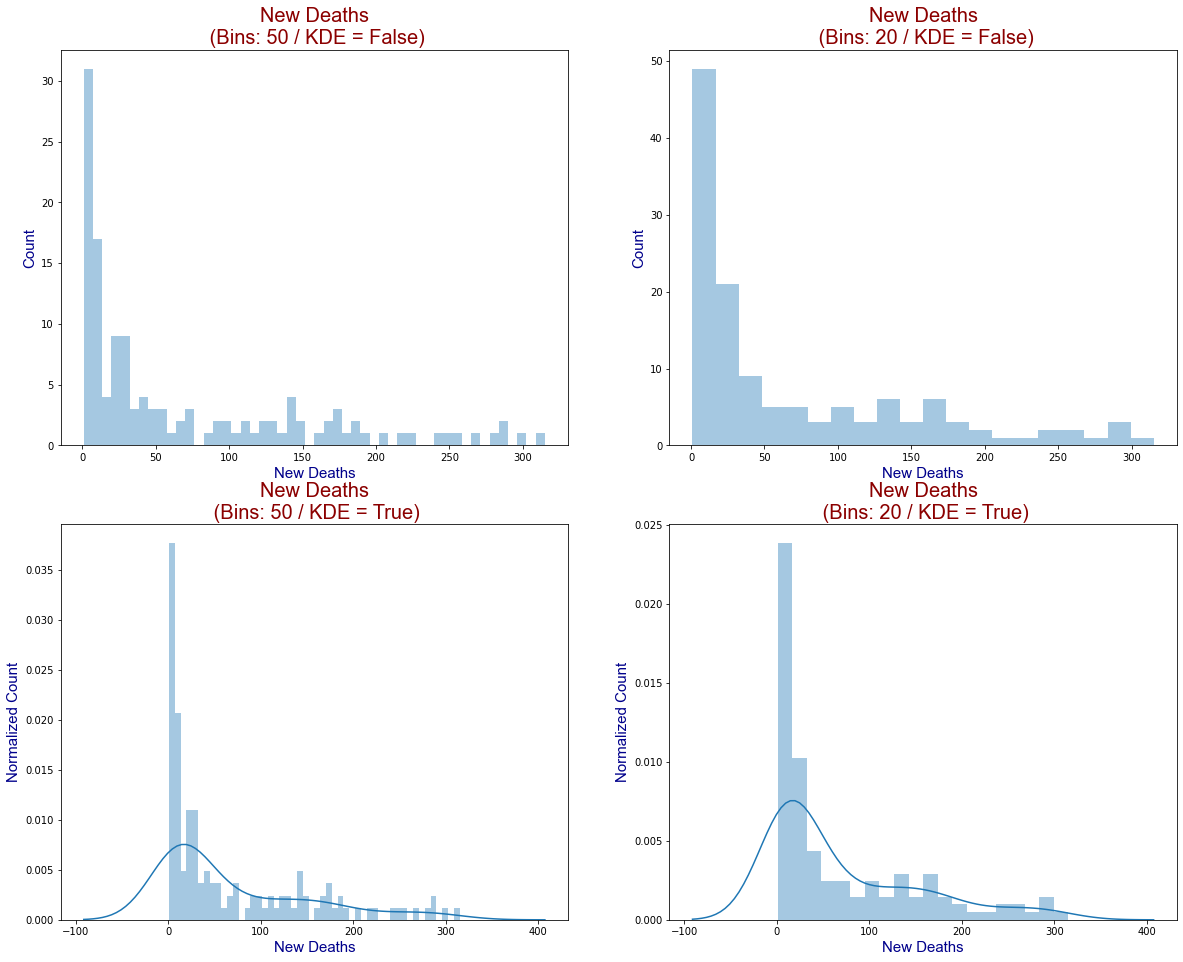

4. Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose.

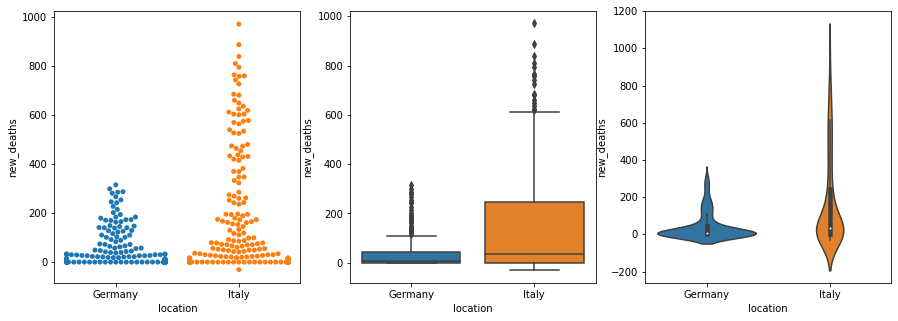

In [7]:
df_2 = df[df.location.isin(['Germany', 'Italy'])]
          
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.swarmplot(x="location", y="new_deaths", data=df_2)
          
plt.subplot(132)
sns.boxplot(x="location", y="new_deaths", data=df_2)

plt.subplot(133)
sns.violinplot(x="location", y="new_deaths", data=df_2)

plt.show()
